In [1]:
cd /Users/eliasimos/Desktop/beaconcha\ data 

/Users/eliasimos/Desktop/beaconcha data


In [2]:
ls

attesterslashings.csv          validator data/
block.csv                      validator.csv
missed_per_epoch_sig.csv       validator_balance_history.csv
missed_per_epoch_sum.csv       validator_performance.csv
proposerslashings.csv          xlsx/


In [354]:
# load useful packages
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
# add seaborn viz
sns.set()

In [4]:
# load and inspect df
df1 = pd.read_csv('block.csv')
df = df1.fillna(0)
df.info()

/Users/eliasimos/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (13,14,15,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458983 entries, 0 to 458982
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      458983 non-null  int64  
 1   slot                    458983 non-null  int64  
 2   status                  458983 non-null  int64  
 3   as_of                   458983 non-null  object 
 4   epoch                   458983 non-null  int64  
 5   eth1data_depositcount   458983 non-null  int64  
 6   attestationscount       458983 non-null  int64  
 7   attesterslashingscount  458983 non-null  int64  
 8   depositscount           458983 non-null  int64  
 9   proposerslashingscount  458983 non-null  int64  
 10  proposer                458983 non-null  int64  
 11  voluntaryexitscount     458983 non-null  int64  
 12  blockroot               458983 non-null  object 
 13  eth1data_blockhash      458983 non-null  object 
 14  eth1data_depositroot

# Some mods

In [5]:
# add column for missed blocks
df['status'] = np.where(df['blockroot'] == '0x01', 'missed', 'proposed')
# add column for missed blocks
df['missed'] = np.where(df['blockroot'] == '0x01', 1, 0)
# drop id column
df.drop(['id'], axis=1)
# arrange by slot
df = df.sort_values(by=['slot'])
df.tail()

,id,slot,status,as_of,epoch,eth1data_depositcount,attestationscount,attesterslashingscount,depositscount,proposerslashingscount,...,blockroot,eth1data_blockhash,eth1data_depositroot,graffiti,graffiti_text,parentroot,randaoreveal,signature,stateroot,missed
137629,458979,466331,proposed,08-10-2020 07:26,14572,80448,105,0,0,0,...,0x12e3127261d7be742579f94afec3e9fa4a79fb374bd2...,0x36c99c77a31658ef9c53831fd9bf45e842109bae1421...,0x4cc5d58d25ea28ccf6a6d30428dd5bf52cb1f1c6a591...,0x3c504f4150537472696e673e00000000000000000000...,0.0,0xc2adb9822940169ba7ca65094c87d02f7b7dd1176d54...,0x964ff3fd5669bf038c5fa7c3835b081aa1457b682823...,0xad0d504afd2f28bb4ec709aeef67035b12a579ed4d3e...,0x5451756b24dc42db851ddccc3c538233faf46c29436e...,0
235396,458980,466332,proposed,08-10-2020 07:26,14572,80448,65,0,0,0,...,0xa10a908e3d22a61942e8275b844f784cef28953cd11b...,0xc4156e1746eeb36b0922e8f64371ac82f83219206d63...,0x4cc5d58d25ea28ccf6a6d30428dd5bf52cb1f1c6a591...,0x6d757368752f7072792f79797a2d6a6331313778387a...,0.0,0x12e3127261d7be742579f94afec3e9fa4a79fb374bd2...,0xb43efeeda3dbe13e26f9fa92c838c94eb137ff39ae43...,0xb7b13d1cebcaa20db6af605eb3c4f31c370a452f1999...,0x0540928c840d0f526857ac1f1d3d8691ac235b53702d...,0
364839,458981,466333,proposed,08-10-2020 07:26,14572,80448,128,0,0,0,...,0x74f5149976969332fbcb8e751818b5c1148df08f2787...,0x36c99c77a31658ef9c53831fd9bf45e842109bae1421...,0x4cc5d58d25ea28ccf6a6d30428dd5bf52cb1f1c6a591...,0x74656b752f76302e31322e3600000000000000000000...,0.0,0xa10a908e3d22a61942e8275b844f784cef28953cd11b...,0xb39a6c298e71fe271e6c59ef9b47aee24b67874890ca...,0xb9b3bd4bbba7687572fc18c5401e9014f2a734fc00fb...,0xc49f69ae534153ecfdcdec9df96eac103d18970f7537...,0
299920,458982,466334,proposed,08-10-2020 07:26,14572,80241,81,0,0,0,...,0x2a7c5decf5f9a7d9fae2e8d45fe47f7d64df60bae1b3...,0x25b8178dfff6c2ec931abdf8a5c3afa9797f20ce2471...,0x1e0562dc3294787328dca856e3cb346d0ba531c94206...,0x706f617071504d494132712f427964612b3344497832...,0.0,0x74f5149976969332fbcb8e751818b5c1148df08f2787...,0xb1c4d140136320fdc29fe0cdd9a06303e14bc444c288...,0xb90dbc8ea996b1670c09c88796f5d0431ea1e737f9b2...,0x4b9dbd02d68d54f14273dfd5d820cadc91748859defd...,0
124594,458983,466335,missed,08-10-2020 07:27,14572,0,0,0,0,0,...,0x01,0,0,0,0.0,0,0,0,0,1


In [6]:
df['proposerslashingscount'].sum()

45

# Missed slots per epoch exploration

In [7]:
# count epochs - should amount to 14572
df['epoch'].nunique()

14383

In [8]:
# count epochs - should amount to 466335
df['slot'].nunique()

458773

It seems that 189 epochs and 7562 slots are missing?! INVESTIGATE

In [347]:
# filter for epochs, status and slots missed
epoch_status = df[["epoch", "status", "missed"]]
epoch_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458983 entries, 128310 to 124594
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   epoch   458983 non-null  int64 
 1   status  458983 non-null  object
 2   missed  458983 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 34.0+ MB


In [348]:
# see head
epoch_status.head()

,epoch,status,missed
128310,0,proposed,0
275568,0,proposed,0
11248,0,missed,1
189560,0,proposed,0
171170,0,proposed,0


In [349]:
epoch_status_missed = pd.pivot_table(epoch_status, index=["epoch"], values=["missed"], aggfunc=sum)
epoch_status_missed.index.name = None
epoch_status_missed

,missed
0,8
1,11
2,16
3,11
4,14
...,...
14568,8
14569,5
14570,6
14571,9


In [350]:
# add columnd for % missed
epoch_status_missed['pct_missed'] = epoch_status_missed['missed']/32
epoch_status_missed.rename_axis(index="epoch")
epoch_status_missed.tail()

,missed,pct_missed
14568,8,0.25000
14569,5,0.15625
14570,6,0.18750
14571,9,0.28125
14572,9,0.28125


In [351]:
#export to csv
#pvt.to_csv('missed_per_epoch_sum.csv')
epoch_status_missed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14572
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   missed      14383 non-null  int64  
 1   pct_missed  14383 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 337.1 KB


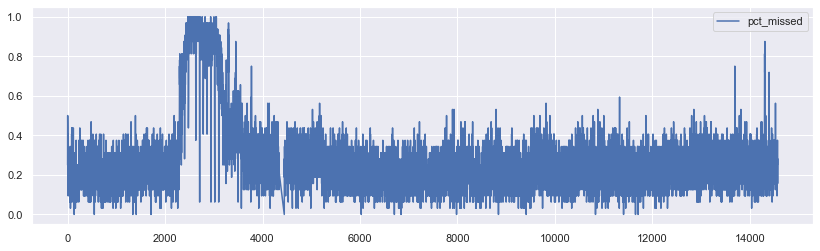

In [352]:
# time series of missed slots
epoch_status_missed.plot(kind='line',y='pct_missed', figsize=(14,4))

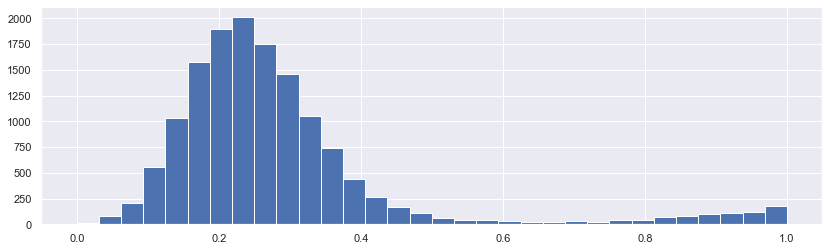

In [353]:
# distribution of missed slots
epoch_status_missed['pct_missed'].hist(bins=32, figsize=(14,4))

It looks like a normal/Kochi distribution - we have tail events happen most likely for over 65% missed blocks

In [16]:
#filter data for missed blocks per epoch > 65%
missed_per_epoch_sig = epoch_status_missed[epoch_status_missed['pct_missed'] > 0.65]
missed_per_epoch_sig.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 2296 to 14394
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   missed      817 non-null    int64  
 1   pct_missed  817 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 19.1 KB


In [17]:
# check if the epoch index is in place as it should be
missed_per_epoch_sig.tail()

,missed,pct_missed
14305,24,0.75000
14306,24,0.75000
14307,21,0.65625
14308,28,0.87500
14394,23,0.71875


# Proposer and attester slashings

In [18]:
# filter for epochs, status, slots,  missed
slashing_count = df[["epoch", "status", "missed", 'attesterslashingscount','proposerslashingscount']]
slashing_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458983 entries, 128310 to 124594
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   epoch                   458983 non-null  int64 
 1   status                  458983 non-null  object
 2   missed                  458983 non-null  int64 
 3   attesterslashingscount  458983 non-null  int64 
 4   proposerslashingscount  458983 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 21.0+ MB


In [19]:
# add pct_missed blocks
slashing_count['pct_missed'] = slashing_count['missed']/32
slashing_count.head()

<ipython-input-19-5711e9e4c01b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slashing_count['pct_missed'] = slashing_count['missed']/32


,epoch,status,missed,attesterslashingscount,proposerslashingscount,pct_missed
128310,0,proposed,0,0,0,0.00000
275568,0,proposed,0,0,0,0.00000
11248,0,missed,1,0,0,0.03125
189560,0,proposed,0,0,0,0.00000
171170,0,proposed,0,0,0,0.00000


In [20]:
# pivot
slashing_count = pd.pivot_table(slashing_count, index=["epoch"], values=['missed', "attesterslashingscount",'proposerslashingscount', 'pct_missed'], aggfunc=sum)
slashing_count.index.name = None
slashing_count.tail()

,attesterslashingscount,missed,pct_missed,proposerslashingscount
14568,0,8,0.25000,0
14569,0,5,0.15625,0
14570,0,6,0.18750,0
14571,0,9,0.28125,0
14572,0,9,0.28125,0


In [21]:
# check correlations
slashing_count.corr()

,attesterslashingscount,missed,pct_missed,proposerslashingscount
attesterslashingscount,1.000000,0.130018,0.130018,-0.005588
missed,0.130018,1.000000,1.000000,-0.009979
pct_missed,0.130018,1.000000,1.000000,-0.009979
proposerslashingscount,-0.005588,-0.009979,-0.009979,1.000000


In [22]:
# check correlations for pct_mised > 65%
slashing_count_sig = slashing_count[slashing_count['pct_missed'] > 0.65]
slashing_count_sig.corr()

,attesterslashingscount,missed,pct_missed,proposerslashingscount
attesterslashingscount,1.000000,-0.352511,-0.352511,-0.010098
missed,-0.352511,1.000000,1.000000,-0.036338
pct_missed,-0.352511,1.000000,1.000000,-0.036338
proposerslashingscount,-0.010098,-0.036338,-0.036338,1.000000


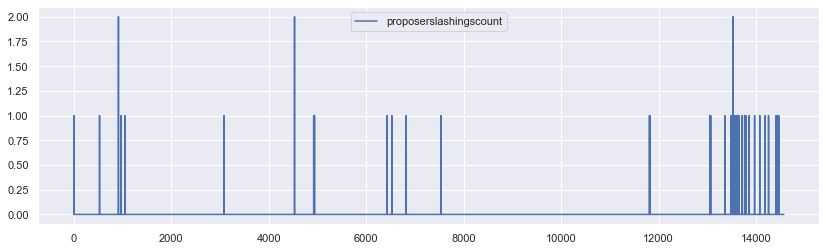

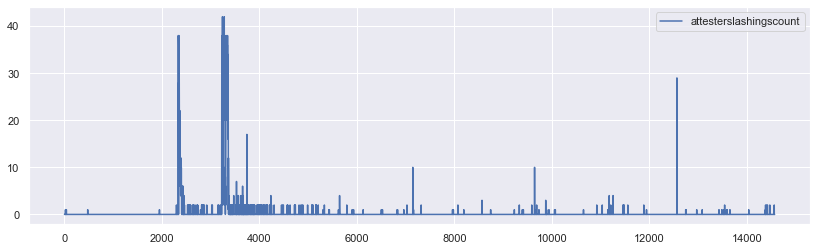

In [343]:
# plot slashings
slashing_count.plot(kind='line', y=['proposerslashingscount'], figsize=(14,4))
slashing_count.plot(kind='line', y=['attesterslashingscount'], figsize=(14,4))

In [24]:
# slashing sums
slashing_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14383 entries, 0 to 14572
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   attesterslashingscount  14383 non-null  int64  
 1   missed                  14383 non-null  int64  
 2   pct_missed              14383 non-null  float64
 3   proposerslashingscount  14383 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 561.8 KB


In [25]:
# slashing sums
prop_slashings = slashing_count['proposerslashingscount'].sum()
att_slashings = slashing_count['attesterslashingscount'].sum()
prop_slashings = slashing_count['proposerslashingscount'].sum()
att_slashings = slashing_count['attesterslashingscount'].sum()

In [26]:
# proposer slashing sum
prop_slashings

45

In [27]:
# attester slashing sum
att_slashings

5015

# Proposer effectiveness

### STEP 1: A coarse view on proposer effectiveness - slots granted vs slots filled

In [30]:
# jog memory on block.csv content
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458983 entries, 128310 to 124594
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      458983 non-null  int64  
 1   slot                    458983 non-null  int64  
 2   status                  458983 non-null  object 
 3   as_of                   458983 non-null  object 
 4   epoch                   458983 non-null  int64  
 5   eth1data_depositcount   458983 non-null  int64  
 6   attestationscount       458983 non-null  int64  
 7   attesterslashingscount  458983 non-null  int64  
 8   depositscount           458983 non-null  int64  
 9   proposerslashingscount  458983 non-null  int64  
 10  proposer                458983 non-null  int64  
 11  voluntaryexitscount     458983 non-null  int64  
 12  blockroot               458983 non-null  object 
 13  eth1data_blockhash      458983 non-null  object 
 14  eth1data_deposi

In [35]:
# select proposer view and add column for participation
proposer_data = df[['epoch', 'slot', 'proposer', 'missed']]
proposer_data['participated'] = 1
proposer_data.head()

<ipython-input-35-0380eb78344b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proposer_data['participated'] = 1


,epoch,slot,proposer,missed,participated
128310,0,0,0,0,1
275568,0,1,9804,0,1
11248,0,2,8597,1,1
189560,0,3,4488,0,1
171170,0,4,1072,0,1


In [48]:
# pivot on proposer effectiveness
proposer_data_pvt = pd.pivot_table(proposer_data, index=["proposer"], values=["missed","participated"], aggfunc=sum)
proposer_data_pvt['proposer_effectiveness'] = (proposer_data_pvt['participated']-proposer_data_pvt['missed'])/proposer_data_pvt['participated']
proposer_data_pvt.index.name = None
proposer_data_pvt.sort_values(by=['participated'], ascending=False)

,missed,participated,proposer_effectiveness
15110,27,27,0.000000
15508,3,26,0.884615
1353,6,26,0.769231
14728,3,25,0.880000
17908,0,25,1.000000
...,...,...,...
64296,0,1,1.000000
53065,1,1,0.000000
64293,0,1,1.000000
64292,0,1,1.000000


In [170]:
# export to csv
proposer_data_pvt.to_csv('proposer_data_pvt1.csv')

In [171]:
# load csv - after fixing index values and renaming to proposer_data_pvt.csv
proposer_data_pvt_mod = pd.read_csv('proposer_data_pvt.csv')
proposer_data_pvt_mod.tail()

,validator_index,missed,participated,proposer_effectiveness
69413,76632,1,1,0.0
69414,76646,0,1,1.0
69415,76668,0,1,1.0
69416,76773,0,1,1.0
69417,76787,0,1,1.0


This is a good first step. Now we need to create some sort of weight for time active

### STEP 2: Validator activation epoch

In [141]:
# load validator csv
val = pd.read_csv('validator.csv')
val['slashed'].fillna(0)
val.tail()

,id,validatorindex,name,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials
78842,78843,78842,NaN,14876,15040,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0x989f6bb8b942587ca2a2e1bb8dec28f5aa13c0269b18...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...
78843,78844,78843,NaN,14876,15040,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0x94efb6400786809437baffe61c28d186b56a37926c6f...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...
78844,78845,78844,NaN,14876,15040,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0xb515eb9e2348e711cbf834013b1dddfa88118460e71e...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...
78845,78846,78845,NaN,14876,15040,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0x9320960892c5cd3853f97009c93929fd6f777657c684...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...
78846,78847,78846,NaN,14906,15041,9223372036854775807,9223372036854775807,32000000000,32000000000,0,0xa7506b532f3f62487774cbfb3288abed4c3101252e1e...,NaN,0x00d77be6277f1cdcfce33fdcb127b95fe91e09eec04a...


In [148]:
# select validator index and activation epoch
val_activation = val[['validatorindex', 'activationepoch', 'slashed']]
val_activation

,validatorindex,activationepoch,slashed
0,0,0,NaN
1,1,0,NaN
2,2,0,NaN
3,3,0,NaN
4,4,0,NaN
...,...,...,...
78842,78842,15040,NaN
78843,78843,15040,NaN
78844,78844,15040,NaN
78845,78845,15040,NaN


In [149]:
# insert parameter and then column for 'epochs active'
latest_epoch = 14572
val_activation['epochs_active'] = latest_epoch-val_activation['activationepoch']
val_activation

<ipython-input-149-9494f84d0f22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_activation['epochs_active'] = latest_epoch-val_activation['activationepoch']


,validatorindex,activationepoch,slashed,epochs_active
0,0,0,NaN,14572
1,1,0,NaN,14572
2,2,0,NaN,14572
3,3,0,NaN,14572
4,4,0,NaN,14572
...,...,...,...,...
78842,78842,15040,NaN,-468
78843,78843,15040,NaN,-468
78844,78844,15040,NaN,-468
78845,78845,15040,NaN,-468


In [150]:
# filter for epochs_active > 0
val_activation = val_activation.loc[val_activation['epochs_active'] > 0]
val_activation

,validatorindex,activationepoch,slashed,epochs_active
0,0,0,NaN,14572
1,1,0,NaN,14572
2,2,0,NaN,14572
3,3,0,NaN,14572
4,4,0,NaN,14572
...,...,...,...,...
76962,76962,14570,NaN,2
76963,76963,14571,NaN,1
76964,76964,14571,NaN,1
76965,76965,14571,NaN,1


The two views we are trying to compare are mismatched such that:
- val_activation.validatorindex.max = 76966
- proposer_data_pvt_mod.validator_index.max = 76787

In the next step, we work a fix so the two indices end at the same number

In [162]:
# filter val_activation for index < 76787
val_activation = val_activation.loc[val_activation['validatorindex'] < 76789]
# check outcome
val_activation

,validatorindex,activationepoch,slashed,epochs_active
0,0,0,NaN,14572
1,1,0,NaN,14572
2,2,0,NaN,14572
3,3,0,NaN,14572
4,4,0,NaN,14572
...,...,...,...,...
76782,76782,14525,NaN,47
76783,76783,14526,NaN,46
76784,76784,14526,NaN,46
76785,76785,14526,NaN,46


### STEP 3: MERGE coarse effectiveness and time active

In [260]:
# check the proposer_data_pvt_mod df and filter for same number of validator_index with the activation df
proposer_data_pvt_mod = proposer_data_pvt_mod.loc[proposer_data_pvt_mod['validator_index'] < 76787]
proposer_data_pvt_mod

,validator_index,missed,participated,proposer_effectiveness
0,0,7,17,0.588235
1,1,5,5,0.000000
2,2,8,8,0.000000
3,3,4,15,0.733333
4,4,0,6,1.000000
...,...,...,...,...
69412,76625,0,1,1.000000
69413,76632,1,1,0.000000
69414,76646,0,1,1.000000
69415,76668,0,1,1.000000


It looks like there is still a mismatch between the datasets; 
- proposer_data_pvt_mod rows: 69418
- val_activation: 76782

So there are 7364 validators that have never proposed a block!

Now we have to find a way to merge the two dataframes only on the values that match on the more populated dataframe (val_activation), and leave the rows that mismatch empty or fillna

In [164]:
#rename column val_activation so it matches the other df
val_activation = val_activation.rename(columns={'validatorindex':'validator_index'})
val_activation

,validator_index,activationepoch,slashed,epochs_active
0,0,0,NaN,14572
1,1,0,NaN,14572
2,2,0,NaN,14572
3,3,0,NaN,14572
4,4,0,NaN,14572
...,...,...,...,...
76782,76782,14525,NaN,47
76783,76783,14526,NaN,46
76784,76784,14526,NaN,46
76785,76785,14526,NaN,46


In [446]:
# left join the two dataframes
proposer_effectiveness = pd.merge(left=val_activation, right=proposer_data_pvt_mod, how='left', left_on='validator_index', right_on='validator_index')
proposer_effectiveness['proposer_effectiveness_time_weighted'] = proposer_effectiveness['proposer_effectiveness']/proposer_effectiveness['epochs_active']
proposer_effectiveness_alpha = proposer_effectiveness.fillna(0)
proposer_effectiveness_alpha.sort_values(by=['validator_index'])

,validator_index,activationepoch,slashed,epochs_active,missed,participated,proposer_effectiveness,proposer_effectiveness_time_weighted
0,0,0,0.0,14572,7.0,17.0,0.588235,0.000040
1,1,0,0.0,14572,5.0,5.0,0.000000,0.000000
2,2,0,0.0,14572,8.0,8.0,0.000000,0.000000
3,3,0,0.0,14572,4.0,15.0,0.733333,0.000050
4,4,0,0.0,14572,0.0,6.0,1.000000,0.000069
...,...,...,...,...,...,...,...,...
76777,76782,14525,0.0,47,0.0,0.0,0.000000,0.000000
76778,76783,14526,0.0,46,0.0,0.0,0.000000,0.000000
76779,76784,14526,0.0,46,0.0,0.0,0.000000,0.000000
76780,76785,14526,0.0,46,0.0,0.0,0.000000,0.000000


### STEP 4: Probability of proposing at least once

Another CRUCIAL bit of information that needs to be incorporated here, and that's not only how many epochs they have been around for, but also what sort of competition they are facing - i.e. what the chances are that they would be selected. 

If they joined later, they also face more competition - so their score should be also mediated by that. Regardless, probably useful to bake timing of proposer slots in, with a little more granularity. 

The probability that a validator got at least one proposer slot after they joined, is the inverse of the probability that they got no slots since they joined - such that:

`P(propose_at_least_once) = 1 - P(not_proposing)^n`

This is a little bit out of my depth to compute here - so moving to excel. Results below:

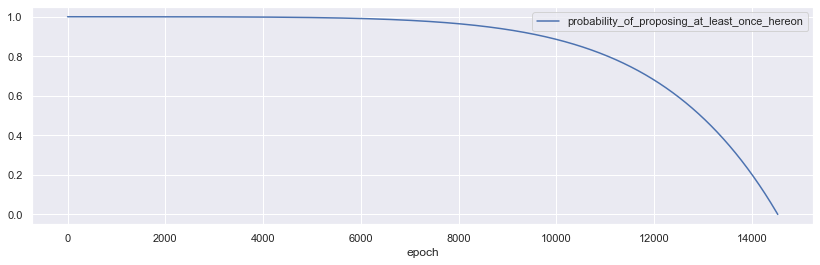

In [424]:
#load csv
val_per_epoch_probs = pd.read_csv('val_per_epoch_probs.csv')
#filter for columns of interest
val_per_epoch_probs = val_per_epoch_probs[['epoch', 'probability_of_proposing_at_least_once_hereon']]
#plot
val_per_epoch_probs.plot(kind='line',x='epoch', y='probability_of_proposing_at_least_once_hereon', figsize=(14,4))

Looks correct! Now let's merge it into the proposer_effectiveness df

In [447]:
#merge dataframes
proposer_effectiveness = pd.merge(left=proposer_effectiveness_alpha, right=val_per_epoch_probs, how='left', left_on='activationepoch', right_on='epoch')
proposer_effectiveness

,validator_index,activationepoch,slashed,epochs_active,missed,participated,proposer_effectiveness,proposer_effectiveness_time_weighted,epoch,probability_of_proposing_at_least_once_hereon
0,0,0,0.0,14572,7.0,17.0,0.588235,0.000040,0,0.999985
1,1,0,0.0,14572,5.0,5.0,0.000000,0.000000,0,0.999985
2,2,0,0.0,14572,8.0,8.0,0.000000,0.000000,0,0.999985
3,3,0,0.0,14572,4.0,15.0,0.733333,0.000050,0,0.999985
4,4,0,0.0,14572,0.0,6.0,1.000000,0.000069,0,0.999985
...,...,...,...,...,...,...,...,...,...,...
76777,76782,14525,0.0,47,0.0,0.0,0.000000,0.000000,14525,0.000844
76778,76783,14526,0.0,46,0.0,0.0,0.000000,0.000000,14526,0.000422
76779,76784,14526,0.0,46,0.0,0.0,0.000000,0.000000,14526,0.000422
76780,76785,14526,0.0,46,0.0,0.0,0.000000,0.000000,14526,0.000422


In [448]:
# print to csv
proposer_effectiveness.to_csv('proposer_effectiveness.csv')

# Proposer effectiveness - analysis

We finally have the table we need to score proposing validators for their proposer effectiveness! Now, here's the catch: these validators should be scored in 2 (or even 3 segments):
- (1) those who haven't caught any breaks because they're still young
- (2) those who haven't caught any breaks but have been around for long enough
- (3) those who have been around enough and caught breaks

From the above, (3) is the only group where the planned "proposer_effectiveness" metric can actually apply. (1) should not be (at all) included in the scoring and (2) ... well we probably need to do more research on protocol rules re: (2)

Let's explore the dataset a bit in order to be able to get to some criteria.

Text(0, 0.5, 'validators with no proposer slots')

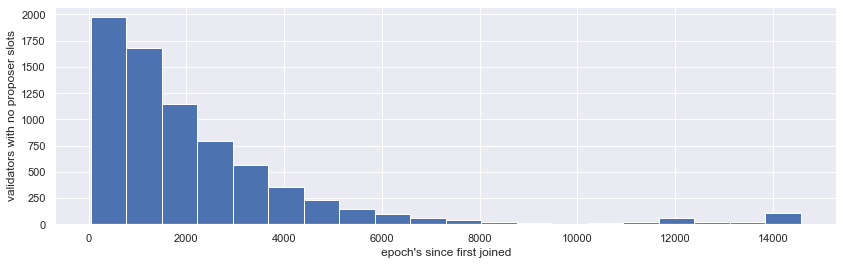

In [459]:
# select those validators that have 0 participations
no_prop = proposer_effectiveness.loc[proposer_effectiveness_master['participated'] == 0]
no_prop['epochs_active'].hist(bins=20, figsize=(14,4))
pl.xlabel("epoch's since first joined")
pl.ylabel("validators with no proposer slots")

The distribution looks ok - expected that for shorter participation, it's more likely that no proposer slotds will have been achieved.

However, there are some interesting observations at the end of the distribution. Particularly validators that have been active for over 11,500 epochs and have YET to achieve a proposer slot.

Let's single them out.

In [458]:
no_prop_outlier = no_prop.loc[no_prop['epochs_active'] > 11700]
no_prop_outlier.info()
no_prop_outlier['slashed'].sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 1800 to 31006
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   validator_index                                207 non-null    int64  
 1   activationepoch                                207 non-null    int64  
 2   slashed                                        207 non-null    float64
 3   epochs_active                                  207 non-null    int64  
 4   missed                                         207 non-null    float64
 5   participated                                   207 non-null    float64
 6   proposer_effectiveness                         207 non-null    float64
 7   proposer_effectiveness_time_weighted           207 non-null    float64
 8   epoch                                          207 non-null    int64  
 9   probability_of_proposing_at_least_once_hereon  20

182.0

Looks like the majority of those got slashed - but was it slashed and out? what happened to their effective balances? Maybe interesting to investigate a little more.

In [460]:
no_prop_outlier.to_csv('prop_effectiveness_no_prop_outlier.csv')

Now, moving on to those that have achieved 1 or more proposer slots

Text(0, 0.5, 'pct of all validators')

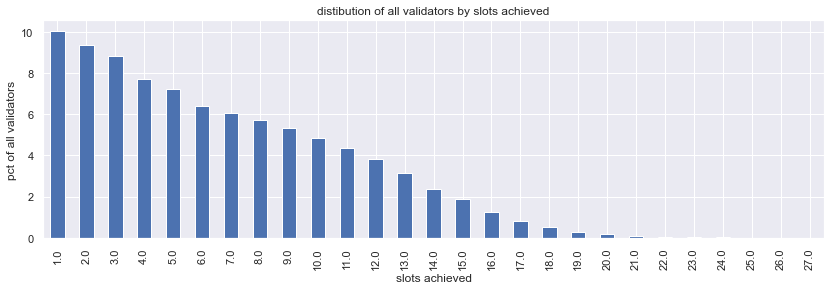

In [462]:
# filter for those with one or more proposer slots
one_plus_prop = proposer_effectiveness.loc[proposer_effectiveness_master['participated'] > 0]
#one_plus_prop.info()
one_plus_prop_a = pd.pivot_table(one_plus_prop, index=["participated"], values=["missed"], aggfunc="count")
one_plus_prop_a.index.name = None
one_plus_prop_a['% of validators that have achieved more than 1 slot'] = one_plus_prop_a['missed']*100/76786
one_plus_prop_a['% of validators that have achieved more than 1 slot'].plot(kind='bar', figsize=(14,4))
pl.title("distibution of all validators by slots achieved")
pl.xlabel("slots achieved")
pl.ylabel("pct of all validators")

Text(0, 0.5, 'slots missed on average')

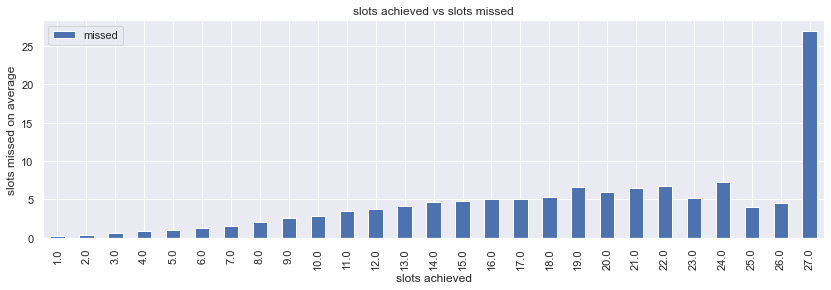

In [463]:
one_plus_prop_b = pd.pivot_table(one_plus_prop, index=["participated"], values=["missed"], aggfunc="mean")
one_plus_prop_b.index.name = None
one_plus_prop_b.plot(kind='bar', figsize=(14,4))
pl.title("slots achieved vs slots missed")
pl.xlabel("slots achieved")
pl.ylabel("slots missed on average")

- Observation 1: 1 validator (15110) who has been active since epoch 0 has achieved 27 slots and missed all 27. This is worth investigating
- Observation 2: the validators that have achieved more than 22 slots are an interesting group  - their slots_missed/slots_achieved ration (effectiveness) seems to be a lot better than others.

Let's take a closer look

In [464]:
one_plus_prop_over_22 = proposer_effectiveness.loc[proposer_effectiveness_master['participated'] > 22]
one_plus_prop_over_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1237 to 23628
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   validator_index                                35 non-null     int64  
 1   activationepoch                                35 non-null     int64  
 2   slashed                                        35 non-null     float64
 3   epochs_active                                  35 non-null     int64  
 4   missed                                         35 non-null     float64
 5   participated                                   35 non-null     float64
 6   proposer_effectiveness                         35 non-null     float64
 7   proposer_effectiveness_time_weighted           35 non-null     float64
 8   epoch                                          35 non-null     int64  
 9   probability_of_proposing_at_least_once_hereon  35 

Only 35 slots there that have been active since the earlier stages of the testnet - not clear if significant.

# Probability of being selected as a proposer per epoch

In [261]:
# now find how many validators have been active in each epoch
val_per_epoch_simple = pd.pivot_table(proposer_effectiveness_master, index=["activationepoch"], values=["validator_index"], aggfunc='count')
val_per_epoch_simple.index.name = None
val_per_epoch_simple = val_per_epoch_simple.cumsum()
val_per_epoch_simple['epoch'] = val_per_epoch_simple.index
val_per_epoch_simple

,validator_index,epoch
14522,76766,14522
14523,76770,14523
14524,76774,14524
14525,76778,14525
14526,76782,14526


In [248]:
# calculate the voluntary exits per epoch over time
voluntary_exits_cum = pd.pivot_table(df, index=["epoch"], values=["voluntaryexitscount"], aggfunc=sum)
voluntary_exits_cum.index.name = None
voluntary_exits_cum = voluntary_exits_cum.cumsum()
voluntary_exits_cum['epoch'] = voluntary_exits_cum.index
voluntary_exits_cum.tail()

,voluntaryexitscount,epoch
14568,1009,14568
14569,1009,14569
14570,1009,14570
14571,1009,14571
14572,1009,14572


In [307]:
# left join the two sets
val_per_epoch_master = pd.merge(left=val_per_epoch_simple, right=voluntary_exits_cum, how='left', left_on = 'epoch', right_on = 'epoch')
val_per_epoch_master['active_validators_per_epoch'] = val_per_epoch_master['validator_index'] - val_per_epoch_master['voluntaryexitscount']
val_per_epoch_master = val_per_epoch_master[['epoch', 'active_validators_per_epoch']]
val_per_epoch_master
#calculate the probability of proposing a block (32 proposers per epoch)
val_per_epoch_master['prob_of_proposing'] = (32/val_per_epoch_master['active_validators_per_epoch'])
val_per_epoch_master

,epoch,active_validators_per_epoch,prob_of_proposing
0,0,20084.0,0.001593
1,38,20088.0,0.001593
2,39,20092.0,0.001593
3,40,20096.0,0.001592
4,41,20100.0,0.001592
...,...,...,...
14171,14522,75757.0,0.000422
14172,14523,75761.0,0.000422
14173,14524,75765.0,0.000422
14174,14525,75769.0,0.000422


In [333]:
#generate a column from 0 to 14526
dfe = pd.DataFrame({ 'epoch' : range(0, 14527)})
#merge and frontfill
val_per_epoch_master = pd.merge(left=dfe, right=val_per_epoch_master, how='left', left_on = 'epoch', right_on = 'epoch')
val_per_epoch_master = val_per_epoch_master.ffill()
val_per_epoch_master
#export to csv
#val_per_epoch_master.to_csv('val_per_epoch_master.csv')

,epoch,active_validators_per_epoch,prob_of_proposing
0,0,20084.0,0.001593
1,1,20084.0,0.001593
2,2,20084.0,0.001593
3,3,20084.0,0.001593
4,4,20084.0,0.001593
...,...,...,...
14522,14522,75757.0,0.000422
14523,14523,75761.0,0.000422
14524,14524,75765.0,0.000422
14525,14525,75769.0,0.000422


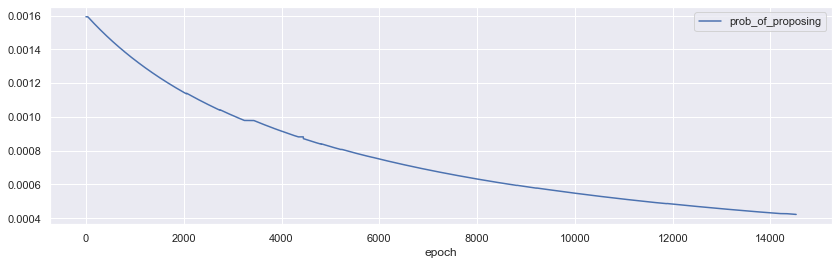

In [342]:
val_per_epoch_master.plot(kind='line',x='epoch', y='prob_of_proposing', figsize=(14,4))

## Validator balances - look after attestations

In [266]:
# merge the two dataframes - val_per_epoch_master AND proposer_effectiveness
#proposer_effectiveness_2 = pd.merge(left=proposer_effectiveness, right=val_per_epoch_master, how='left', left_on = 'activationepoch', right_on = 'epoch')
#proposer_effectiveness_2

In [218]:
# load validator_balance csv - you can use this to measure for effectiveness too
val_perf = pd.read_csv('validator_performance.csv')
# fix balances
val_perf['balance'] = val_perf['balance']/1e9
val_perf['performance1d'] = val_perf['performance1d']/1e9
val_perf['performance31d'] = val_perf['performance31d']/1e9
val_perf['performance365d'] = val_perf['performance365d']/1e9
val_perf['performance7d'] = val_perf['performance7d']/1e9
# skim for the remainder to fit the df above
val_perf = val_perf.loc[val_perf['validatorindex'] < 76789]
val_perf.tail()

,id,validatorindex,balance,performance1d,performance31d,performance365d,performance7d
76762,76764,76784,32.003484,-0.002969,0.003484,0.003484,0.003484
76763,76765,76785,32.003458,-0.002899,0.003458,0.003458,0.003458
76764,76766,76786,32.003416,-0.003050,0.003416,0.003416,0.003416
76765,76767,76787,32.005647,-0.002968,0.005647,0.005647,0.005647
76766,76768,76788,32.013760,0.006788,0.013760,0.013760,0.013760


looks like it worked - let's put it in a csv!

In [191]:
# select those validators that have 0 participations
no_prop = proposer_effectiveness_master.loc[proposer_effectiveness_master['participated'] == 0]
no_prop

,validator_index,activationepoch,slashed,epochs_active,missed,participated,proposer_effectiveness
1800,1800,0,1.0,14572,0.0,0.0,0.0
1803,1803,0,1.0,14572,0.0,0.0,0.0
2102,2102,0,1.0,14572,0.0,0.0,0.0
2112,2112,0,1.0,14572,0.0,0.0,0.0
2123,2123,0,1.0,14572,0.0,0.0,0.0
...,...,...,...,...,...,...,...
76777,76782,14525,0.0,47,0.0,0.0,0.0
76778,76783,14526,0.0,46,0.0,0.0,0.0
76779,76784,14526,0.0,46,0.0,0.0,0.0
76780,76785,14526,0.0,46,0.0,0.0,0.0


# Notes

In [205]:
# load validator_balance csv
val_bal = pd.read_csv('validator_balance_history.csv')
val_bal['balance'] = val_bal['balance']/1e9
val_bal['effectivebalance'] = val_bal['effectivebalance']/1e9
val_bal.head()

,id,validatorindex,epoch,balance,effectivebalance
0,1,0,14898,31.751490,31.0
1,2,0,14897,31.751459,31.0
2,3,0,14896,31.751428,31.0
3,4,0,14895,31.751398,31.0
4,5,0,14894,31.751367,31.0
